# Final Project Submission

Please fill out:
* Student name:  James Irving
* Student pace: ~~self paced / part time / full time~~: all-the-time
* Scheduled project review date/time: Now & Forever
* Instructor name: Life/Google

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

- Parkinson's Disease is a neurological disorder that affects coordination, balance, walking, and can also affect speech.
    - [NIA - Parkinson's Disease]( https://www.nia.nih.gov/health/parkinsons-disease#:~:text=Parkinson's%20disease%20is%20a%20brain,have%20difficulty%20walking%20and%20talking)
    
    -[Parkinson's Foundation](https://www.parkinson.org/Understanding-Parkinsons/Symptoms/Non-Movement-Symptoms/Speech-and-Swallowing-Problems)
    
- This dataset was created during the publication for > "A comparative analysis of speech signal processing algorithms for Parkinson’s disease classification and the use of the tunable Q-factor wavelet transform" 
    - https://doi.org/10.1016/j.asoc.2018.10.022

# OBTAIN

- The dataset was downloaded from https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification. 
>- "Abstract: The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9).
    - Data Source: 

- [Related paper](https://www.sciencedirect.com/science/article/abs/pii/S1568494618305799?via%3Dihub)
    - PDF located inside `reference` folder.
    - See Table 1 on page 9.
    

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE,SMOTENC


## Models & Utils
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from time import time

In [17]:
# Explainers
import shap
print(shap.__version__)
shap.initjs()

0.37.0


In [7]:
# ## Changing Pandas Options to see full columns in previews and info
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)

In [8]:
df = pd.read_csv('data/pd_speech_features.csv',skiprows=1)
df

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227        240               239   
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385        417               416   
752  250       0  0.16084  0.56499  0.59194        415               413   
753  251       0  0.88389  0.72335  0.46815        381               380   
754  251       0  0.83782  0.74890  0.49823        340               339   
755  251       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0            0.008064            0.000087       0.00218      0.000018   
1            0.008258            0.000073       0.00195      0.000016   
2            0.008340            0.000060       0.00176      0.000015   
3            0.010858            0.000183       0.00419      0.000046   
4            0.008162            0.002669       0.00535      0.000044   
..                ...                 ...           ...           ...   
751          0.004627            0.000052       0.00064      0.000003   
752          0.004550            0.000220       0.00143      0.000006   
753          0.005069            0.000103       0.00076      0.000004   
754          0.005679            0.000055       0.00092      0.000005   
755          0.005676            0.000037       0.00078      0.000004   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
0      0.00067     0.00129    0.00200     0.05883         0.517      0.03011   
1      0.00052     0.00112    0.00157     0.05516         0.502      0.02320   
2      0.00057     0.00111    0.00171     0.09902         0.897      0.05094   
3      0.00149     0.00268    0.00446     0.05451         0.527      0.02395   
4      0.00166     0.00227    0.00499     0.05610         0.497      0.02909   
..         ...         ...        ...         ...           ...          ...   
751    0.00008     0.00022    0.00024     0.01947         0.171      0.01068   
752    0.00016     0.00041    0.00047     0.04291         0.482      0.02307   
753    0.00011     0.00030    0.00034     0.02978         0.263      0.01597   
754    0.00017     0.00041    0.00052     0.03552         0.311      0.01791   
755    0.00014     0.00033    0.00042     0.03702         0.326      0.01940   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0        0.03496       0.04828     0.09034                 0.970805   
1        0.03675       0.06195     0.06961                 0.984322   
2        0.06497       0.07772     0.15282                 0.974846   
3        0.02857       0.04462     0.07185                 0.968343   
4        0.03327       0.05278     0.08728                 0.975754   
..           ...           ...         ...                      ...   
751      0.01260       0.01547     0.03204                 0.997438   
752      0.02626       0.03272     0.06920                 0.976867   
753      0.01916       0.02271     0.04790                 0.995544   
754      0.02348       0.02648     0.05373                 0.988241   
755      0.02332       0.02765     0.05820                 0.996402   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                      0.036223                      18.995     69.997496   
1                      0.017974                      21.497     67.415903   
2                      0.026313                      17.651     62.661706   
3                      0.042003                      19.865     76.306989   
4                

# SCRUB

In [18]:
## null value check
nulls= df.isna().sum()
# nulls[nulls>0]
nulls.sum()

0

In [19]:
## Preview columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 755 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              756 non-null    int64  
 1   gender                          756 non-null    int64  
 2   PPE                             756 non-null    float64
 3   DFA                             756 non-null    float64
 4   RPDE                            756 non-null    float64
 5   numPulses                       756 non-null    int64  
 6   numPeriodsPulses                756 non-null    int64  
 7   meanPeriodPulses                756 non-null    float64
 8   stdDevPeriodPulses              756 non-null    float64
 9   locPctJitter                    756 non-null    float64
 10  locAbsJitter                    756 non-null    float64
 11  rapJitter                       756 non-null    float64
 12  ppq5Jitter                      756

### Features

- In order to preprocess this dataset, I should identify related features based on their names and create a dictionary to be able to slice out all related columns for EDA.


- Features include results of vairous speech signal processing algorithms including (see Table 1 below):
    - Time Frequency Features
    - Mel Frequency Cepstral Coefficients (MFCCs)
    - Wavelet Transform based Features, 
    - Vocal Fold Features 
    - and TWQT features 

- Remaining Feature Questions

    - [ ] Which cols are "Fundamenal frequency parameters"?
    
<img src="./reference/table_1.png" width=60%>



In [11]:
## Defining Clusters of related columns for EDA/preprocessing

feature_types = dict(patient_info = ['id','gender'], 
     baseline = ['Jitter', 'Shimmer','Harmonicity', 'RPDE','DFA',"PPE"],
     time_frequency = ['intensity'], 
     mel_spectrogram = ['MFCC'],
     tqwt = ['tqwt'])

feature_types

{'patient_info': ['id', 'gender'],
 'baseline': ['Jitter', 'Shimmer', 'Harmonicity', 'RPDE', 'DFA', 'PPE'],
 'time_frequency': ['intensity'],
 'mel_spectrogram': ['MFCC'],
 'tqwt': ['tqwt']}

In [12]:
## Quick test filter for stub names
# list(filter(lambda x: 'intensity' in x.lower(),df.columns))

In [13]:
def make_feature_dict(df,feature_types):
    """Finds column names by recognizing name stubs (partial col names)
    
    Args:
        df (Frame): df with columns to filter.
        feature_types (dict): dict with category of features as the first key
        and a list of stub names of columns that belong to that category.
        
    Returns:
        feature_cols: dict of filtered columns grouped by "feature_types" keys.
        all_columns: list of all filtered columns without grouping.
        
        
    EXAMPLE USAGE:
    >>  feature_types = dict(patient_info = ['id','gender'], 
                        time_frequency = ['intensity'],
                        baseline = ['Jitter','Harmonicity'])
    >> feature_cols ,all_cols = make_feature_dict(df,feature_types)
    >> feature_cols
    ## RETURNS: 
    {'patient_info': ['id', 'gender'],
     'time_frequency': ['minIntensity', 'maxIntensity', 'meanIntensity'],
     'baseline': ['locPctJitter',
      'locAbsJitter',
      'rapJitter',
      'ppq5Jitter',
      'ddpJitter',
      'meanAutoCorrHarmonicity',
      'meanNoiseToHarmHarmonicity',
      'meanHarmToNoiseHarmonicity']}
        """
    ## create epty dict to fill in related features and empty list for all cols
    feature_cols = {}
    all_columns= []
    
    ## For each feature type and the list of stub names
    for feat_type, name_list in feature_types.items():
#         feature_cols[feat_type] = {}

        ## Maker a list to handle single-column results 
        curr_type_cols = []
        
        ## For each name stub
        for name in name_list:
            ## Get all columns containing stub
            cols = [c for c in df.columns if name.lower() in c.lower()]
            
            ## Add cols to both current type and all columns
            curr_type_cols.extend(cols)
            all_columns.extend(cols)
            
            ## save list of columns under feature_type
            feature_cols[feat_type] = curr_type_cols
            
            
            ### OLD CODE WHEN ORIGINALLY USING NESTED DICT
#             ## If the name 
#             if name.lower() == feat_type.lower():
#                 feature_cols[feat_type] = cols
                
#             else:
#                 ## combine names
#                 feature_cols[feat_type] = cols
                
            
            
    return feature_cols, all_columns


In [20]:
## Saving dict of all identified clusters of features
feature_cols,filtered_cols = make_feature_dict(df,feature_types)
feature_cols.keys()

dict_keys(['patient_info', 'baseline', 'time_frequency', 'mel_spectrogram', 'tqwt'])

In [21]:
## How many cols grabbed by function
len(filtered_cols)

480

In [22]:
## testing feat_cols dict
feature_cols['baseline']

['locPctJitter',
 'locAbsJitter',
 'rapJitter',
 'ppq5Jitter',
 'ddpJitter',
 'locShimmer',
 'locDbShimmer',
 'apq3Shimmer',
 'apq5Shimmer',
 'apq11Shimmer',
 'ddaShimmer',
 'meanAutoCorrHarmonicity',
 'meanNoiseToHarmHarmonicity',
 'meanHarmToNoiseHarmonicity',
 'RPDE',
 'DFA',
 'PPE']

### BOOKMARK FOR LATER: Sorting out remaining cols to group/filter

In [23]:
# df_unmatched = df.drop(columns=filtered_cols)
# df_unmatched.info()

# EXPLORE

## Finding Categorical Features

In [24]:
## Seeing which columns may be categorical
df.nunique()[(df.nunique() < 20)]

gender    2
class     2
dtype: int64

In [25]:
## making gender a str so its caught by pipeline
df['gender'] = df['gender'].astype(str)

# MODELING

## Train/Test Split & Final Preprocessing

In [26]:
## Specifying root names of types of features to loop through and filter out from df
target_col = 'class'
drop_cols = ['id']

y = df[target_col].copy()
X = df.drop(columns=[target_col,*drop_cols]).copy()
y.value_counts(1)

1    0.746032
0    0.253968
Name: class, dtype: float64

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train

gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
621      1  0.80765  0.77470  0.48003        272               271   
453      0  0.22485  0.70769  0.67057        243               241   
321      1  0.86739  0.76934  0.26560        259               258   
71       1  0.31431  0.77186  0.62721        231               230   
223      1  0.47019  0.75495  0.63768        227               226   
..     ...      ...      ...      ...        ...               ...   
52       0  0.83406  0.57905  0.45109        411               410   
284      0  0.80052  0.75465  0.49046        298               297   
600      0  0.21126  0.72589  0.55435        267               266   
189      1  0.82749  0.76107  0.64650        199               198   
168      1  0.78891  0.62873  0.60956        239               238   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
621          0.007086            0.000072       0.00151      0.000011   
453          0.007919            0.002816       0.00804      0.000064   
321          0.007434            0.000042       0.00140      0.000010   
71           0.008341            0.000250       0.00327      0.000027   
223          0.008497            0.002735       0.00835      0.000071   
..                ...                 ...           ...           ...   
52           0.004702            0.000085       0.00119      0.000006   
284          0.006461            0.000174       0.00279      0.000018   
600          0.007220            0.002507       0.00239      0.000017   
189          0.009667            0.000088       0.00240      0.000023   
168          0.008083            0.000063       0.00204      0.000017   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
621    0.00034     0.00079    0.00103     0.10381         0.933      0.05817   
453    0.00264     0.00387    0.00792     0.10127         0.922      0.04839   
321    0.00035     0.00081    0.00104     0.03849         0.336      0.02040   
71     0.00099     0.00190    0.00296     0.07151         0.687      0.03246   
223    0.00301     0.00483    0.00902     0.07295         0.658      0.03590   
..         ...         ...        ...         ...           ...          ...   
52     0.00013     0.00034    0.00039     0.09534         0.895      0.04074   
284    0.00047     0.00112    0.00140     0.03401         0.297      0.01570   
600    0.00072     0.00086    0.00215     0.08828         0.912      0.04537   
189    0.00083     0.00155    0.00249     0.11834         1.065      0.06285   
168    0.00050     0.00117    0.00150     0.11152         0.998      0.04287   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
621      0.06233       0.08377     0.17452                 0.979507   
453      0.06380       0.09698     0.14516                 0.921376   
321      0.02605       0.03143     0.06119                 0.994007   
71       0.04059       0.07369     0.09739                 0.950451   
223      0.04851       0.05736     0.10769                 0.923906   
..           ...           ...         ...                      ...   
52       0.05677       0.10875     0.12223                 0.982524   
284      0.02112       0.03453     0.04709                 0.984539   
600      0.05267       0.06935     0.13612                 0.978760   
189      0.07282       0.10453     0.18855                 0.955958   
168      0.07232       0.12801     0.12860                 0.932237   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
621                    0.021075                      17.552     67.838159   
453                    0.093712                      12.194     66.328892   
321                    0.006051                      23.914     69.656145   
71                     0.062826                      15.330     73.548472   
223                    0.114484                      14.646     74.619531   
..        

In [28]:
from sklearn import set_config
set_config(display='diagram')

In [29]:
## saving list of numeric vs categorical feature
num_cols = list(X_train.select_dtypes('number').columns)
cat_cols = list(X_train.select_dtypes('object').columns)

## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,drop='first'))])

print('# of num_cols:',len(num_cols))
print('# of cat_cols:',len(cat_cols))

# of num_cols: 752
# of cat_cols: 1


In [30]:
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scale', MinMaxScaler())])

In [31]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', MinMaxScaler())]),
                                 ['PPE', 'DFA', 'RPDE', 'numPulses',
                                  'numPeriodsPulses', 'meanPeriodPulses',
                                  'stdDevPeriodPulses', 'locPctJitter',
                                  'locAbsJitter', 'rapJitter', 'ppq5Jitter',
                                  'ddpJitter', 'locShimmer', 'locDbShimmer',
                                  'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer',
                                  'ddaShimmer', 'meanAutoCorrHarmonicity',
                                  'meanNoiseToHarmHarmonicity',
                                  'meanHarmToNoiseHarmonicity', 'minIntensity',
                                  'maxIntensity', 'meanIntensity', 'f1', 'f2',
                                  'f3', 'f4', 'b1', 'b2', ...]),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['gender'])])

In [33]:
# X_tr = preprocessor.fit_transform(X_train)
# X_te = preprocessor.transform(X_test)
# X_tr

In [34]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)

## Use the encoder's .get_feature_names
cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
                            .get_feature_names(cat_cols))
X_cols = num_cols+cat_features

In [35]:
## Transform X_traian,X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)

## Tranform X_train and X_test and make into DataFrames
X_train_df

PPE       DFA      RPDE  numPulses  numPeriodsPulses  \
621  0.884530  0.747881  0.454340   0.298343          0.298673   
453  0.211635  0.531119  0.720112   0.266298          0.265487   
321  0.953505  0.730543  0.155245   0.283978          0.284292   
71   0.314925  0.738694  0.659632   0.253039          0.253319   
223  0.494902  0.683994  0.674236   0.248619          0.248894   
..        ...       ...       ...        ...               ...   
52   0.915022  0.114996  0.413973   0.451934          0.452434   
284  0.876297  0.683024  0.468888   0.327072          0.327434   
600  0.195944  0.589992  0.558004   0.292818          0.293142   
189  0.907437  0.703791  0.686538   0.217680          0.217920   
168  0.862893  0.275700  0.635013   0.261878          0.262168   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
621          0.458548            0.017685      0.047204      0.039149   
453          0.535256            0.808036      0.284314      0.245956   
321          0.490609            0.009130      0.043210      0.037976   
71           0.574062            0.068899      0.111111      0.104045   
223          0.588439            0.784630      0.295570      0.274494   
..                ...                 ...           ...           ...   
52           0.238993            0.021458      0.035585      0.019133   
284          0.400992            0.047038      0.093682      0.068078   
600          0.470882            0.718983      0.079158      0.064951   
189          0.696216            0.022437      0.079521      0.088016   
168          0.550314            0.015006      0.066449      0.061823   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
621   0.029012    0.040504   0.029607    0.397832      0.425863     0.431110   
453   0.237534    0.209086   0.237764    0.387441      0.420515     0.354199   
321   0.029918    0.041598   0.029909    0.130620      0.135634     0.134083   
71    0.087942    0.101259   0.087915    0.265699      0.306271     0.228924   
223   0.271079    0.261631   0.270997    0.271589      0.292173     0.255977   
..         ...         ...        ...         ...           ...          ...   
52    0.009973    0.015873   0.010272    0.363183      0.407389     0.294039   
284   0.040798    0.058566   0.040785    0.112293      0.116675     0.097122   
600   0.063463    0.044335   0.063444    0.334301      0.415654     0.330450   
189   0.073436    0.082102   0.073716    0.457271      0.490034     0.467914   
168   0.043518    0.061303   0.043807    0.429372      0.457462     0.310790   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
621     0.297809      0.300942    0.431140                 0.951498   
453     0.305334      0.348609    0.354181                 0.809636   
321     0.112101      0.112077    0.134076                 0.986883   
71      0.186527      0.264569    0.228965                 0.880590   
223     0.227068      0.205644    0.255963                 0.815810   
..           ...           ...         ...                      ...   
52      0.269349      0.391080    0.294076                 0.958860   
284     0.086865      0.123263    0.097117                 0.963778   
600     0.248362      0.248908    0.330485                 0.949675   
189     0.351505      0.375852    0.467916                 0.894029   
168     0.348946      0.460578    0.310773                 0.836141   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
621                    0.026879                    0.503995      0.709173   
453                    0.122319                    0.334126      0.681859   
321                    0.007139                    0.705694      0.742073   
71                     0.081737                    0.433549      0.812514   
223                    0.149611                    0.411864      0.831897   
..                          ...                         ...     

In [41]:
y.value_counts(1)

1    0.746032
0    0.253968
Name: class, dtype: float64

## Resampling with SMOTENC

In [36]:
y_train.value_counts(1)

1    0.75485
0    0.24515
Name: class, dtype: float64

In [37]:
## Save list of trues and falses for each cols
smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
# smote_feats

In [38]:
## resample training data
smote = SMOTENC(smote_feats)
X_train_sm,y_train_sm = smote.fit_resample(X_train_df,y_train)
y_train_sm.value_counts()

1    428
0    428
Name: class, dtype: int64

In [44]:

tic = time() #timing!

svc_linear = SVC(kernel='linear', probability=True,C=1)
svc_linear.fit(X_train_df, y_train)

y_pred_train = svc_linear.predict(X_train_df)
y_pred_test = svc_linear.predict(X_test_df)

toc = time()
print(f"Run time is {toc-tic} seconds")

Run time is 0.9279670715332031 seconds


              precision    recall  f1-score   support

           0       0.80      0.68      0.73        53
           1       0.88      0.93      0.91       136

    accuracy                           0.86       189
   macro avg       0.84      0.81      0.82       189
weighted avg       0.86      0.86      0.86       189

Train accuracy: 0.9753
Test accuracy: 0.8624


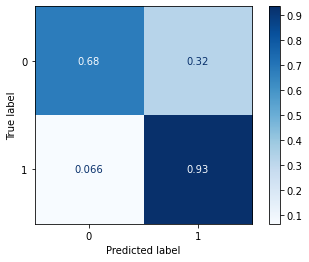

In [45]:
# how'd we do?
from sklearn.metrics import classification_report, plot_confusion_matrix , accuracy_score

print(classification_report(y_test, y_pred_test)) 
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

plot_confusion_matrix(svc_linear, X_test_df, y_test,cmap='Blues',normalize='true')
plt.show()

## Using SHAP and Shapely Values for Model Interpretation




- White Paper on Shapely Values:
    - https://arxiv.org/abs/1705.07874
    
- Towards Data Science Blog Posts:
    - [Explain Your Model with SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

    - [Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)





- Videos/Talks:
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
    

> **Using SHAP with SVMS: https://slundberg.github.io/shap/notebooks/Iris%20classification%20with%20scikit-learn.html**
- Must run the SVC with `probability=True` to be able to use `.predict_proba`, which is needed for the `KernelExplainer`

### Using SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        

In [46]:
import shap 
shap.initjs()

In [47]:
svc_linear

SVC(C=1, kernel='linear', probability=True)

In [48]:
# pred_func = svc_linear.decision_function
X_shap = shap.sample(X_test,nsamples=100)
explainer = shap.KernelExplainer(svc_linear.predict_proba,X_shap)
explainer#.predict#.fit(X_train)

In [49]:
shap_values = explainer.shap_values(X_shap,nsamples=100)#, nsamples=1000)


In [60]:
# shap.force_plot(shap_values[0],X_test)

shap.summary_plot(explainer.expected_value, shap_values) 

AssertionError: Summary plots need a matrix of shap_values, not a vector.

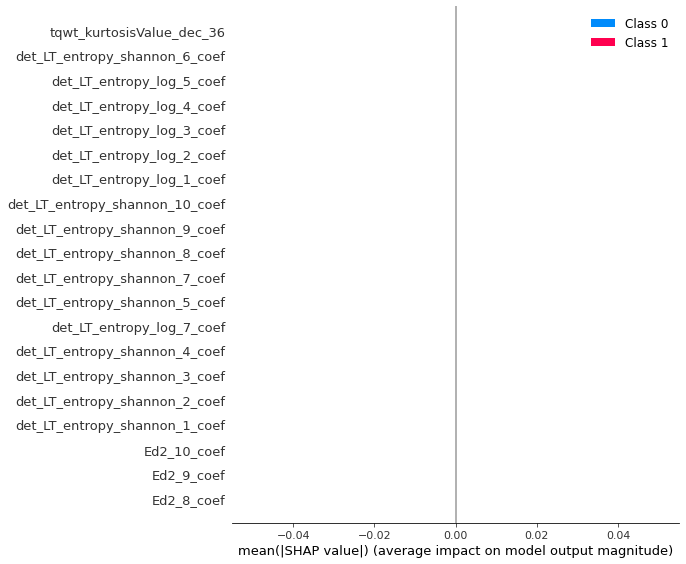

In [51]:
shap.summary_plot(shap_values,X_test,plot_type='bar')

In [ ]:

# # med = X_train.median().values.reshape((1,X_train.shape[1]))
# explainer = shap.KernelExplainer(f, med)


# shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)
# shap.force_plot(explainer.expected_value, shap_values_single, X_display.iloc[0,:])

In [ ]:
# y_hat_test = svc_linear.predict(X_test)
# svm_explainer = KernelShap(pred_fcn)
# svm_explainer.fit(X_train_norm)

### To Get Expanations for Trees:



- Import and initialize javascript:

```python
import shap 
shap.initjs()
```
1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data

### Summary Plot

```python

## For normal bar graph of importance:
shap.summary_plot(shap_values,X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row

row = np.random.choice(range(len(X_train))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

### First: Linear Kernel

In [ ]:
## Using SHAP and Shapely Values for Model Interpretation




- White Paper on Shapely Values:
    - https://arxiv.org/abs/1705.07874
    
- Towards Data Science Blog Posts:
    - [Explain Your Model with SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

    - [Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)





- Videos/Talks:
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
    

> **Using SHAP with SVMS: https://slundberg.github.io/shap/notebooks/Iris%20classification%20with%20scikit-learn.html**
- Must run the SVC with `probability=True` to be able to use `.predict_proba`, which is needed for the `KernelExplainer`

### First: Linear Kernelfrom sklearn.ensemble import RandomForestClassifier


# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.